# Momentos estatísticos - Assimetria e Curtose

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

Às vezes, a média ea variância não são suficientes para descrever uma distribuição. Quando calculamos a variação, colocamos os desvios em torno da média. No caso de grandes desvios, não sabemos se é provável que sejam positivos ou negativos. Este é o lugar onde a aspereza e a simetria de uma distribuição entram. Uma distribuição é *simétrica* se as partes de cada lado da média forem imagens espelhadas umas das outras. Por exemplo, a distribuição normal é simétrica. A distribuição normal com média $ \mu $ e desvio padrão $ \sigma $ é definida como

$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Podemos plota-lo para confirmar que é simétrico:

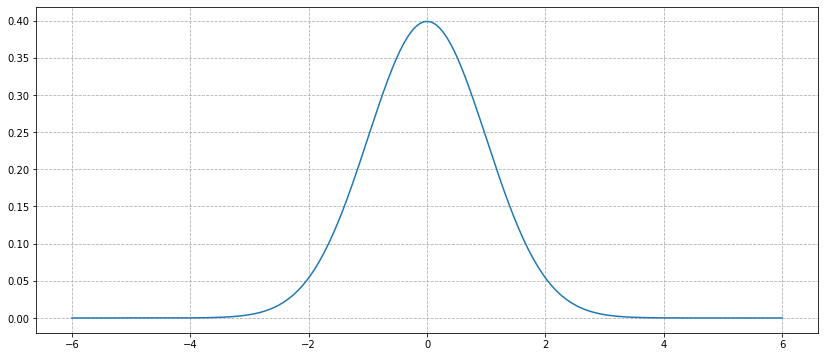

In [2]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.figure(figsize=(14,6))
plt.plot(xs, normal)
plt.grid(linestyle='--')

Uma distribuição que não é simétrica é chamada *inclinada*. Por exemplo, uma distribuição pode ter muitos pequenos valores positivos positivos e alguns grandes negativos (negativamente inclinados) ou vice-versa (positivamente inclinados) e ainda têm uma média 0. Uma distribuição simétrica tem inclinação 0. Uma distribuição unimodal positivamente inclinada têm a propriedade que *média > mediana > moda*. As distribuições unimodais negativamente inclinadas tem com *média < mediana < moda*. Todos os três são iguais para uma distribuição simétrica unimodal.

A fórmula explícita para inclinação é:
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

Onde $ n $ é o número de observações, $ \mu $ é a média aritmética e $ \sigma $ é o desvio padrão. O sinal dessa quantidade descreve a direção da inclinação conforme descrito acima. Podemos traçar uma distribuição positivamente inclinada e negativamente inclinada para ver como eles se parecem. Para distribuições unimodais, uma inclinação negativa normalmente indica que a cauda é mais gorda à esquerda, enquanto uma inclinação positiva indica que a cauda está mais gorda à direita.

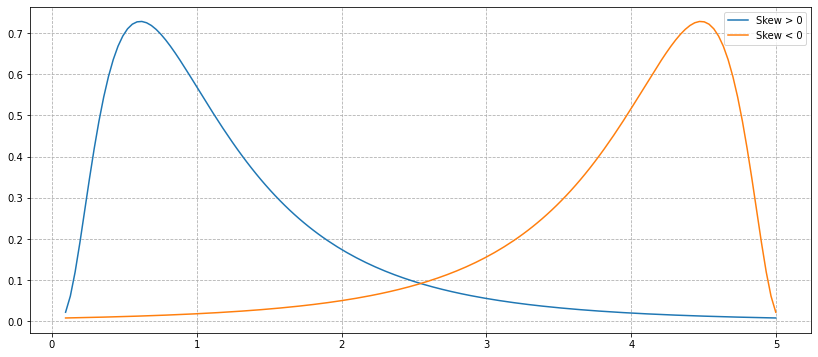

In [3]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

plt.figure(figsize=(14,6))
plt.grid(linestyle='--')

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

# Curtose

Curtose (*kurtosis*) tenta medir a forma do desvio da média. Geralmente, esta descreve o quão rapido é o decaimento das extremidades da distribuição comparada com a distribuição normal, chamada mesocúrtica (*mesokurtotic*). Todas as distribuições normais, independentemente da média e variância, têm uma curtose de 3. Uma distribuição leptocúrtica (*leptokurtic*) (curtose > 3) é concentrada e tem caudas gordas, enquanto uma distribuição platicúrtica (*platykurtic*) (curtose < 3) é ampla. Às vezes, no entanto, a curtose em excesso da distribuição normal ($curtose - 3$) é usada, e este é o padrão no `scipy`. Uma distribuição leptocúrtica tem saltos maiores mais frequentemente do que uma distribuição normal, enquanto uma distribuição platicúrtica apresenta saltos grandes menos frequentemente.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


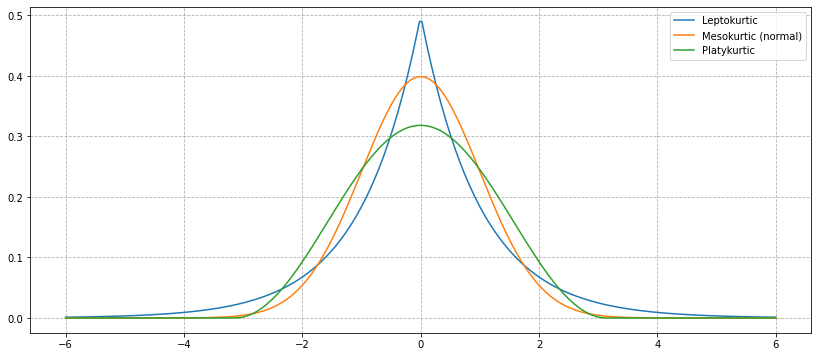

In [4]:
# Plot some example distributions
plt.figure(figsize=(14,6))
plt.grid(linestyle='--')
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k')))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend();

A equação que descreve a curtose é  

$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

enquanto a curtose excessiva é dada por  

$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

Para um número grande de amostras, o excesso de curtose torna-se aproximadamente  

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Uma vez que, acima, estávamos considerando distribuições perfeitas e contínuas, essa era a forma que a curtose assumia. No entanto, para um conjunto de amostras amostradas da distribuição normal, usamos a primeira definição, e a (excesso) de curtose seria aproximadamente 0.

# Demais momentos padronizados

Não é por acaso que a variância, a inclinação e a curtosis assumem formas semelhantes. Eles são os primeiros e mais importantes momentos padronizados, dos quais o $ k $-ésimo tem a forma

$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$

O primeiro momento padronizado é sempre $ 0 $ $(E[X - E[X]] = E[X] - E[E[X]] = 0)$ então só nos interessamos pelo segundo ao quarto. Todos os momentos padronizados são números adimensionais que descrevem a distribuição e, em particular, podem ser usados para quantificar o quão próximo ao normal (com os momentos padronizados $ 0, \sigma, 0, \sigma ^ 2 $), uma distribuição é.

# Teste de Normalidade Usando Jarque-Bera

O teste de Jarque-Bera é um teste estatístico comum que compara se os dados da amostra têm inclinação e curtose similares as de uma distribuição normal.  
A hipótese nula do teste de Jarque Bera é que os dados vieram de uma distribuição normal.

Lembre-se de tratar valores-p como binários e não tentar usa-los para inferencia ou compará-los. Usaremos um ponto de corte de 0,05 para o nosso valor p.

## Calibração do teste

Lembre-se de que cada teste é escrito diferente em diferentes linguagens de programação. Você pode não saber se é a hipótese nula ou alternativa que os dados testados provêm de uma distribuição normal. Recomenda-se que utilize a notação e pesquisa online para encontrar a documentação do teste; Além disso, muitas vezes é uma boa idéia calibrar um teste, verificando-o em dados simulados e certificando-se de que ele dá a resposta certa. Vamos fazer isso agora.

In [5]:
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.05


Ótimo, se devidamente calibrado, devemos esperar estar equivocando $ 5 \% $ do tempo com um nível de significância de 0,05, e isso é bom o bastante. Isso significa que o teste está funcionando como esperamos.

[Retornar para o sumário](./index.html)